# First Practical Work

## Data Science and Engineering

### DESIGN OF AN IMAGE FILTER FUNCTION, PARALLELIZABLE AND SCALABLE

**Full name:** Alejo Gonzalez Garcia,
               Andres Navarro Pedregal
    
**NIA:** 100454351, 100451730

In [1]:
import numpy as np
import multiprocessing as mp
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cProfile

import my_functions as my # Import all our created functions

In [2]:
images = ["chess.jpg", "cloudsonjupi.jpg", "digits.jpg", "fence.jpg", "hand-x-ray.jpg"]
F_IMAGE1= images[4]
F_IMAGE2= images[4]

In [3]:
image1= np.array(Image.open(F_IMAGE1)); print(image1.shape)
image2= np.array(Image.open(F_IMAGE1)); print(image2.shape)

(1920, 1597, 3)
(1920, 1597, 3)


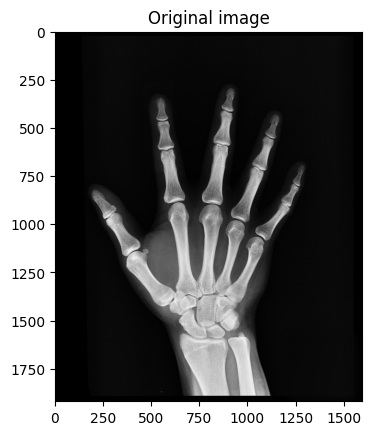

In [4]:
# Let´s show the image we are going to work with: 
plt.figure()
plt.imshow(image1)
plt.title("Original image")
plt.show()

In [5]:
filter1=np.array([
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

filter2=np.array([[0.5, 0 , -0.5]]) 

filter3=np.array([[0.5],[0],[-0.5]])

filter4=np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])
filter5=np.array([
    [0.00078633,0.00655965,0.01330373,0.00655965,0.00078633],
    [0.00655965,0.05472157,0.11098164,0.05472157,0.00655965],
    [0.01330373,0.11098164,0.22508352,0.11098164,0.01330373],
    [0.00655965,0.05472157,0.11098164,0.05472157,0.00655965],
    [0.00078633,0.00655965,0.01330373,0.00655965,0.00078633]
])

In [6]:
# Let´s use multiprocessing library to get the Cores for each possible PC we are working on: 
NUMPROCESS=mp.cpu_count()
print(NUMPROCESS)

8


In [7]:
import ctypes  # This library automatically provides us with the required space for each type

image1_memory_size = image1.shape[0] * image1.shape[1] * image1.shape[2] # Memory size to store the image1
image2_memory_size = image2.shape[0] * image2.shape[1] * image2.shape[2] # Memory size to store the image2

filtered_image1_VECTOR = mp.Array(ctypes.c_byte,image1_memory_size) # MULTIPROCESSING VECTOR FOR IMAGE1
filtered_image2_VECTOR = mp.Array(ctypes.c_byte,image2_memory_size) # MULTIPROCESSING VECTOR FOR IMAGE2


In [8]:
def tonumpyarray(mp_arr):
    #mp_array is a shared memory array with lock
    
    return np.frombuffer(mp_arr.get_obj(),dtype=np.uint8)

In [9]:
# Understanding how does Pool work: 

number = range(100)
my.sum_square_with_mp(number)
my.sum_square_without_mp(number)
# It takes lot of time as the load is really small but if we increase it
# we start gaining lot of computational time. 

number = range(10000)
my.sum_square_with_mp(number)
my.sum_square_without_mp(number)

Processing 100 numbers took 0.0582423210144043 time using multiprocessing. 
Processing 100 numbers took 0.00022935867309570312 time using serial processing. 


Processing 10000 numbers took 1.078202247619629 time using multiprocessing. 
Processing 10000 numbers took 2.9173476696014404 time using serial processing. 


# AFTER THIS CELL YOU HAVE TO WRITE YOUR CODE

After this cell you have to use the preloaded image defined in the F_IMAGE variable, select two of the 5 filter predefined, and using the NUMPROCESS processors, apply the filters to the image and check results.

* The first filter is impulse response filter (the image output must be equals to the original one).
* The second filter is an edge filter, first order in x axis,  
* The third filter is an edge filter, first order in y axis,
* the fourth filter is an edge filter, second order, bi-directional
* the fifth filter is a blur gausian filter.

# Visualization
In this last cells we take the filtered images stored in the multiprocessing.Vector variables filtered_image1_VECTOR and filtered_image2_VECTOR, converts to numpy array, with the same shape of the orginal images, and show the results.

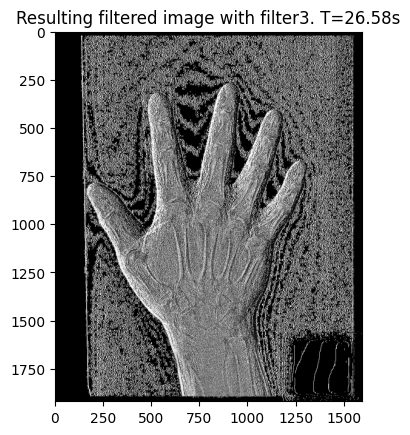

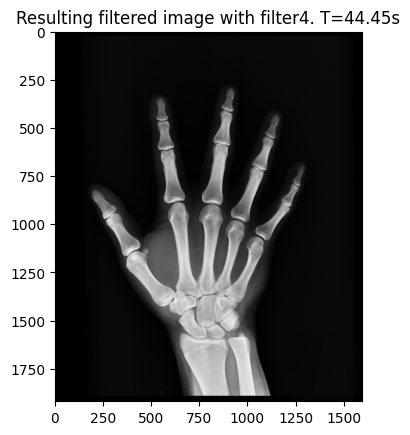

In [26]:
import time

filter_sample = [filter4, filter5] # We have to choose 2 out of the 5 filters. 
filter_vector = [filtered_image1_VECTOR, filtered_image2_VECTOR] # Array with the images vector
filtered_image = [] # Here we will store the final filtered images

for i in range(len(filter_sample)):
    start_time = time.time() # We are going to measure the time taken to compute each of the images. 
    my.image_filter(image1, filter_sample[i],  NUMPROCESS, filter_vector[i])
    filtered_image.append(my.tonumpyarray(filter_vector[i]).reshape(image1.shape))
    end_time = time.time() - start_time

    plt.figure()
    plt.imshow(filtered_image[i])
    plt.title(f"Resulting filtered image with filter{i+4}. T={round(end_time,2)}s")
    plt.show()

## Part 2: 

Now we are going to apply again two filters but using the ```filters_execution()``` function we have created. 

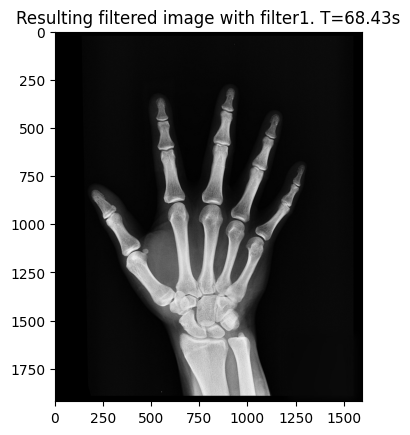

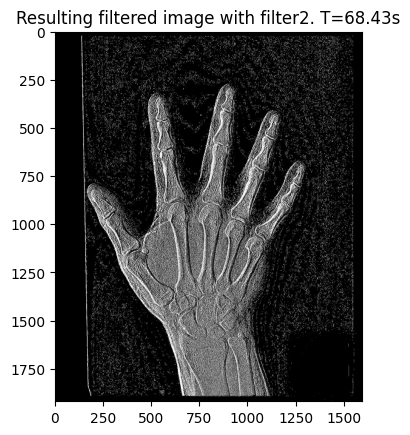

In [13]:
import time

filter_sample = [filter1, filter2] # We have to choose 2 out of the 5 filters. 

start_time = time.time() # We are going to measure the time taken to compute each of the images. 
my.filters_execution(image1, filter_sample[0], filter_sample[1], NUMPROCESS, filtered_image1_VECTOR, filtered_image2_VECTOR)
end_time = time.time() - start_time

filtered_image1 = my.tonumpyarray(filtered_image1_VECTOR).reshape(image1.shape)
filtered_image2 = my.tonumpyarray(filtered_image2_VECTOR).reshape(image2.shape)
filtered_images = [filtered_image1, filtered_image2]

for i in range(2):
    plt.figure()
    plt.imshow(filtered_images[i])
    plt.title(f"Resulting filtered image with filter{i+1}. T={round(end_time,2)}s")
    plt.show()

# Now the time taken to filter BOTH images is computed. 

### Conclusions: 
